In [1]:
# Import everything, load data
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import MARIGOLD as mpd 
from MARIGOLD import Condition
print(sys.version)
#print(process_data.__file__)u

path_to_dump = 'C:\\Users\\quanz\\PhD'

cwd = os.path.abspath('')
dat_to_fetch = 'U-bend_database.dat'
refetch = True

if not os.path.isfile(os.path.join(cwd, dat_to_fetch)) or refetch:
    mpd.extractLocalDataFromDir(path_to_dump, dump_file=dat_to_fetch, skip_terms= ['CFD', 'Copy'], require_terms= ['jf'], sheet_type='adix_template') # Defaults to PITA database


database = mpd.loadProbeData(os.path.join(cwd, dat_to_fetch))

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "cm"
ms = mpd.marker_cycle()
cs = mpd.color_cycle()
%matplotlib widget
%load_ext autoreload
%autoreload 2

3.10.1 (tags/v3.10.1:2cd268a, Dec  6 2021, 19:10:37) [MSC v.1929 64 bit (AMD64)]
Nope. Skipping...


In [2]:
for cond in database:
    if cond.jf == 4.00 and  cond.jgref == 0.334:
    #  if 'P4' in cond.port:
      mpd.write_pdf(cond, output_tex = cond.name + '.pdf')
    #  break

jf: 0.7 jg: 0.3796815788874584 Port: P6
-90
alpha1:  0.08997066666666666
alpha2:  0.35225888888888884
ai1:  116.22755555555554
ai2:  45.33002222222222
alpha*vg1:  0.09304666666666667
alpha*vg2:  0.3467866666666667
<<Dsm1>> 4.789404897513978
alpha_variance:  0.35475999365592104


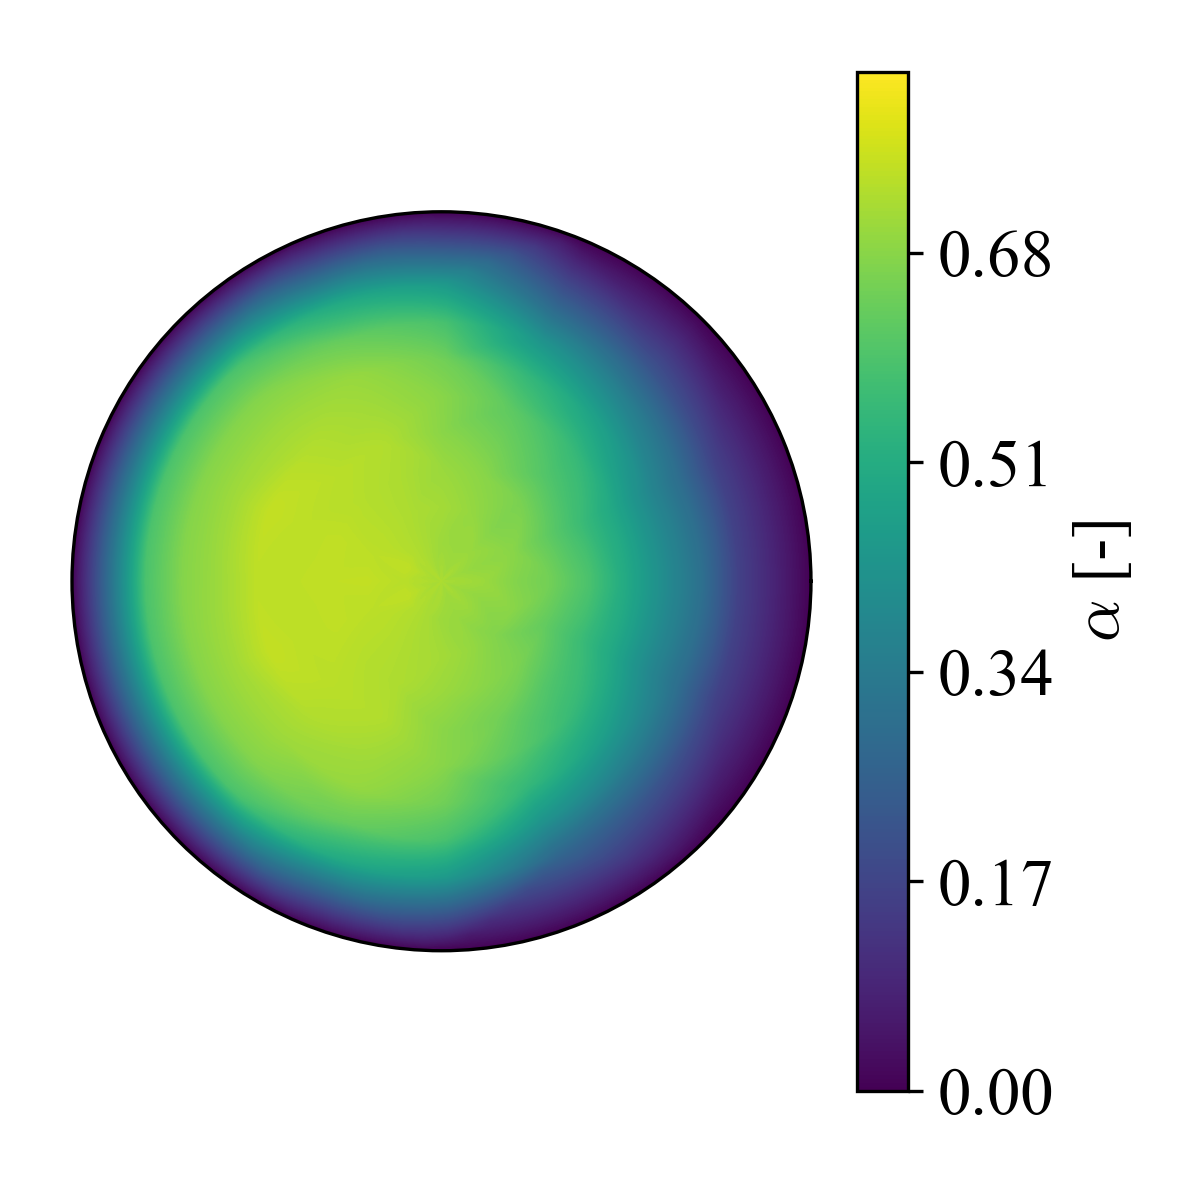

jf: 2.0 jg: 0.11859742130879111 Port: P6
-90
alpha1:  0.07789829629629628
alpha2:  0.0005364444444444442
ai1:  128.58172222222223
ai2:  0.24195555555555545
alpha*vg1:  0.11690296296296294
alpha*vg2:  0.0005677777777777775
<<Dsm1>> 3.8191529736984506
alpha_variance:  1.7530827188034253


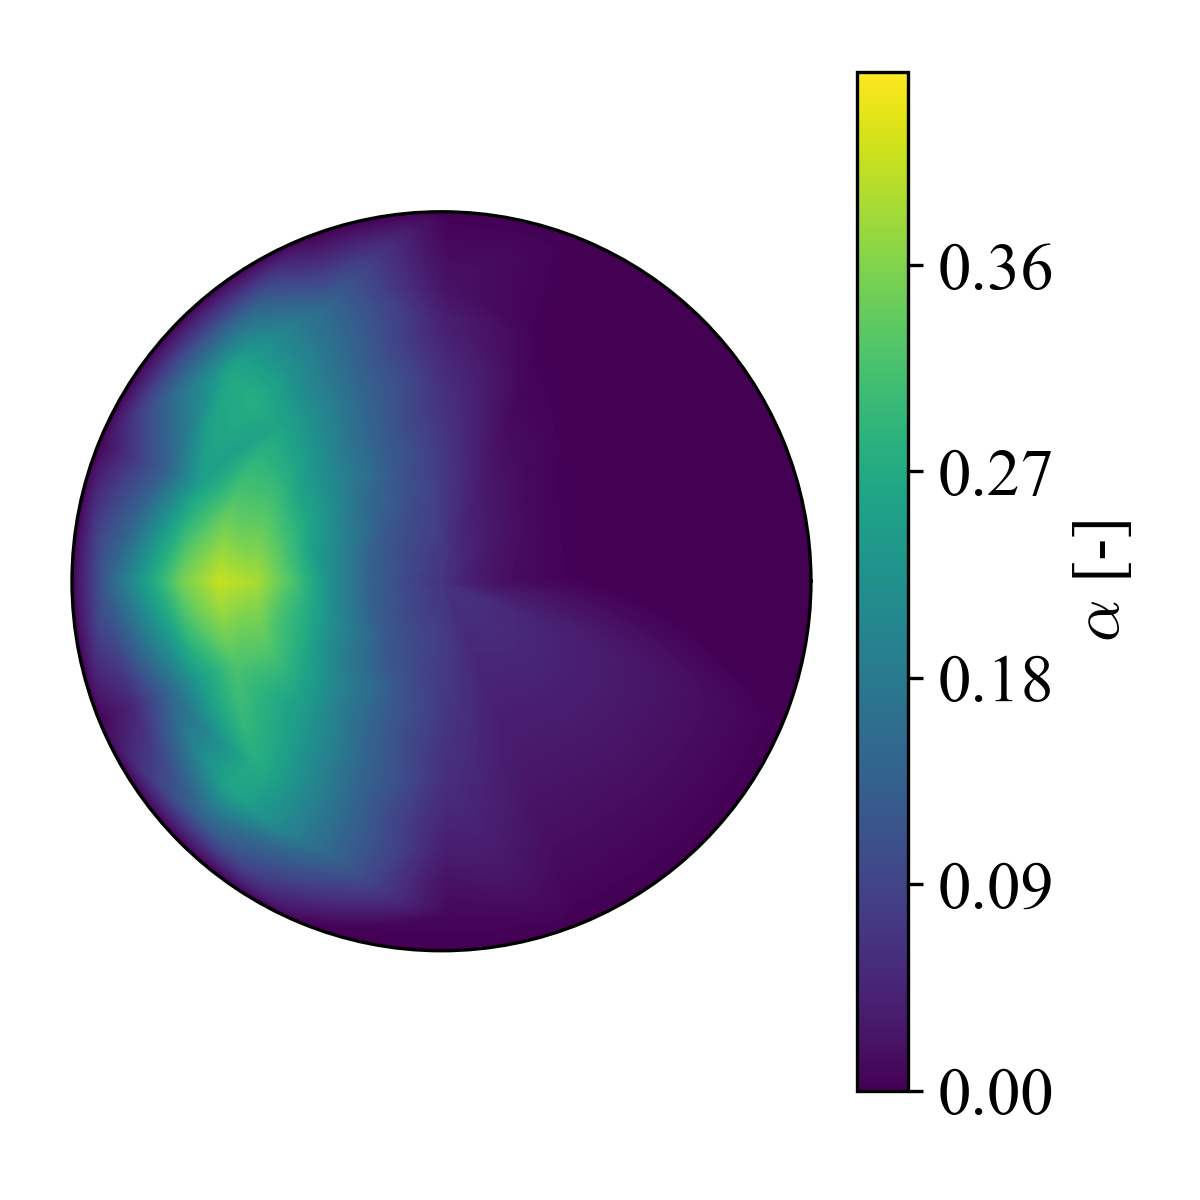

jf: 2.0 jg: 0.3961351849609652 Port: P6
-90
alpha1:  0.17125388888888887
alpha2:  0.10862088888888888
ai1:  254.69415555555554
ai2:  36.900699999999986
alpha*vg1:  0.2991811111111111
alpha*vg2:  0.11866777777777775
<<Dsm1>> 4.650619902193578
alpha_variance:  1.500046858148926


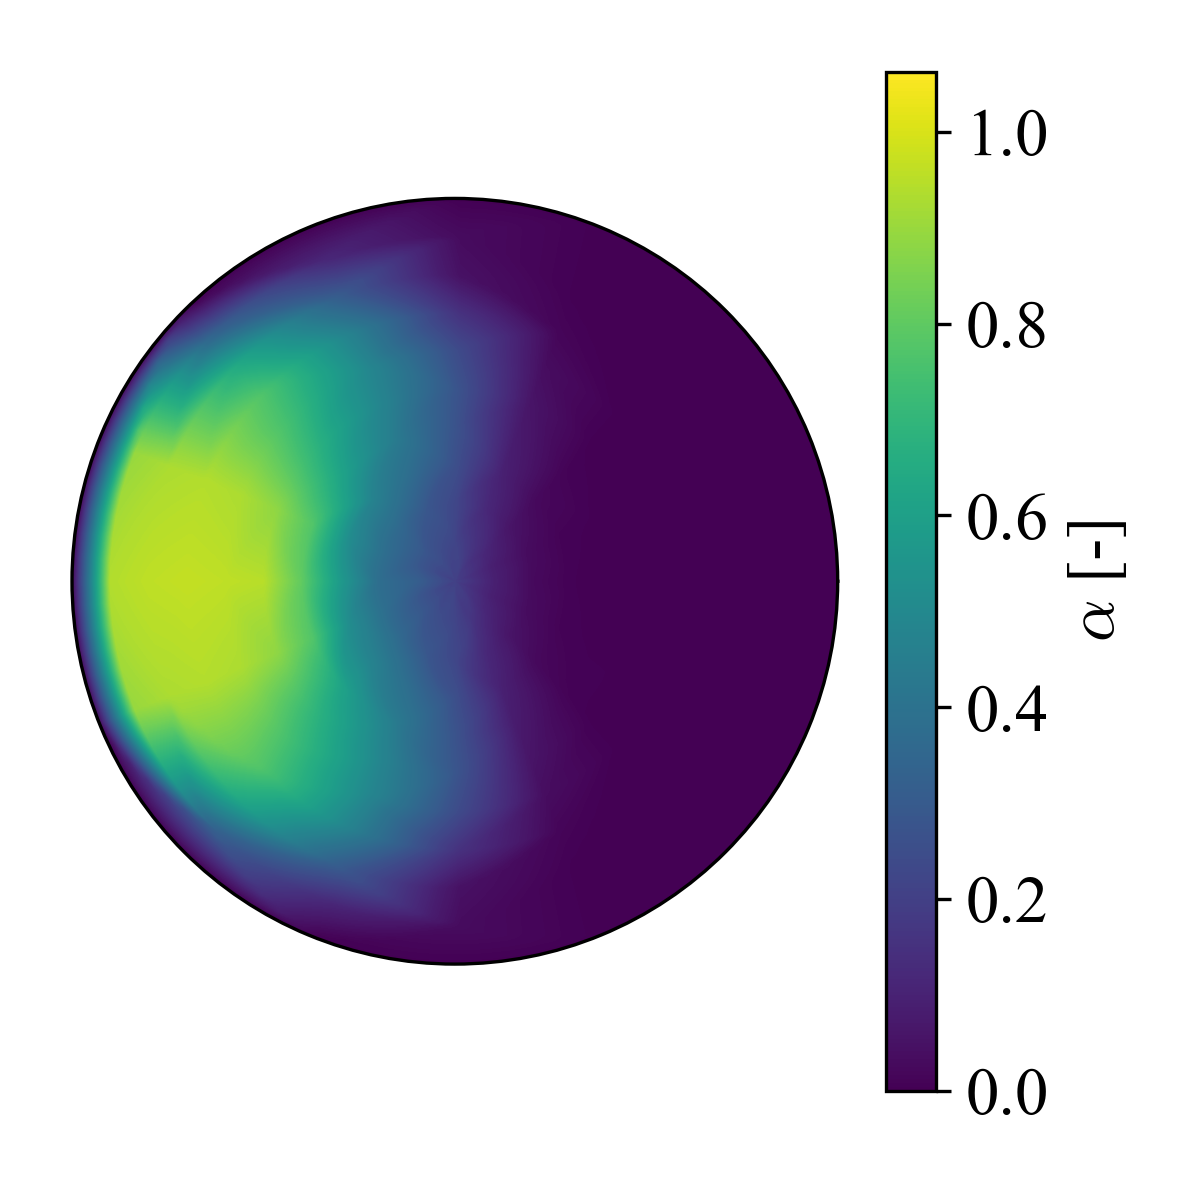

jf: 2.0 jg: 0.8151312598978521 Port: P6
-90
alpha1:  0.11014655555555555
alpha2:  0.23313044444444442
ai1:  197.1642
ai2:  39.61531111111111
alpha*vg1:  0.2874
alpha*vg2:  0.5159599999999998
<<Dsm1>> 3.6520223875602937
alpha_variance:  1.130941213326228


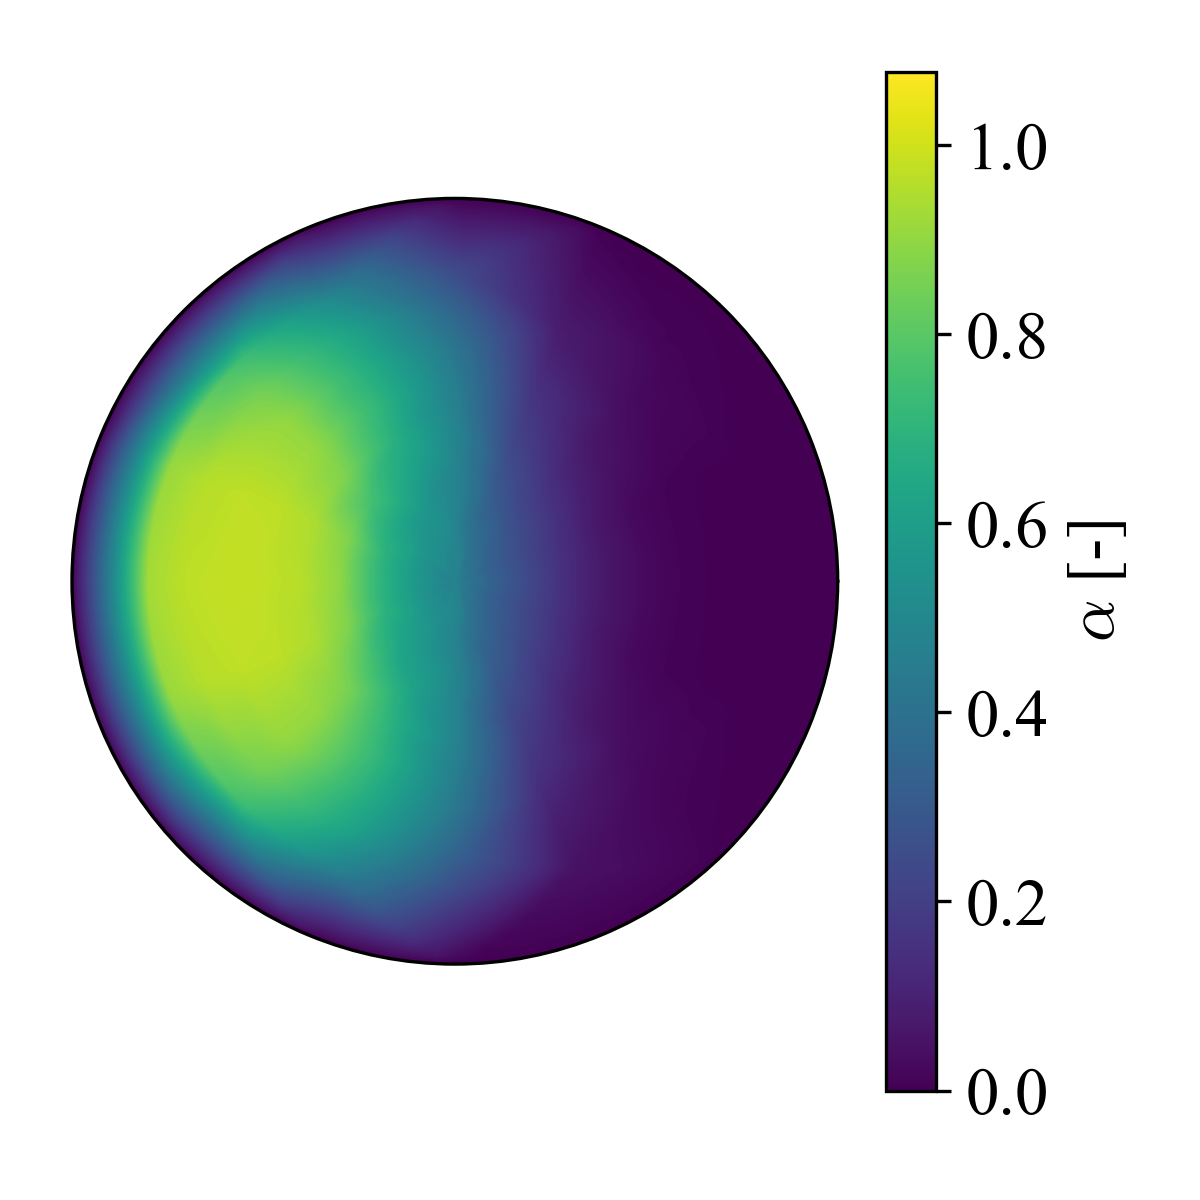

jf: 3.3 jg: 0.11980910535615824 Port: P6
-90
alpha1:  0.04897366666666666
alpha2:  0.0005781111111111106
ai1:  131.03295555555556
ai2:  0.2912444444444442
alpha*vg1:  0.11459888888888886
alpha*vg2:  0.0009144444444444437
<<Dsm1>> 2.3388274533359943
alpha_variance:  3.658753017036708


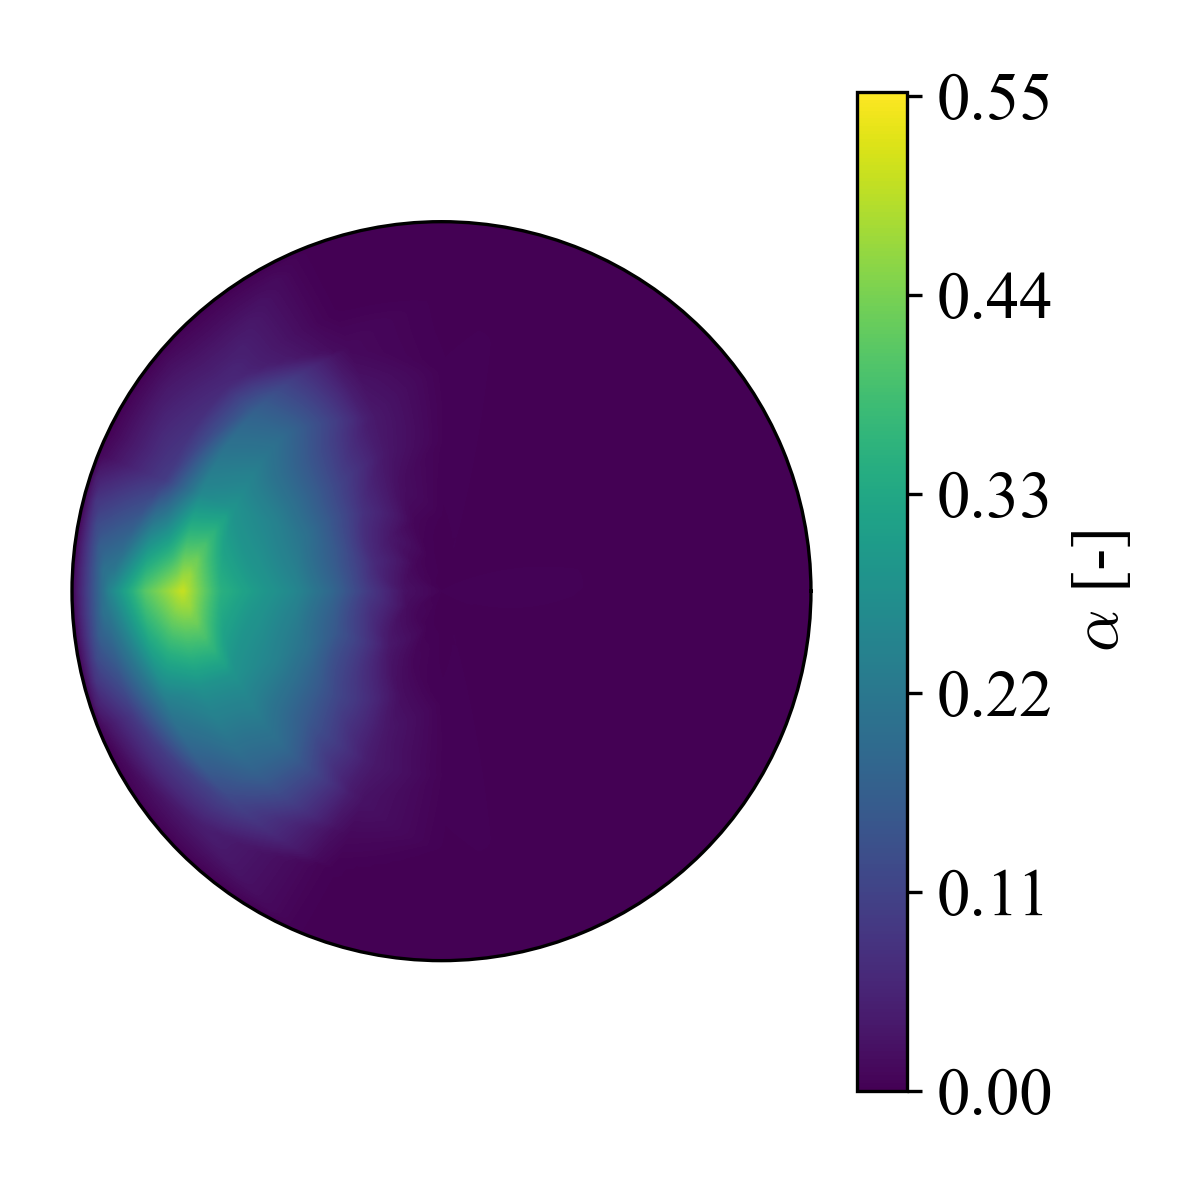

jf: 4.0 jg: 0.12064668830245934 Port: P6
-90
alpha1:  0.04006133333333333
alpha2:  1.0555555555555554e-05
ai1:  123.63301111111109
ai2:  0.008244444444444443
alpha*vg1:  0.11732777777777775
alpha*vg2:  3.333333333333328e-06
<<Dsm1>> 1.9178044985097387
alpha_variance:  4.067713989214358


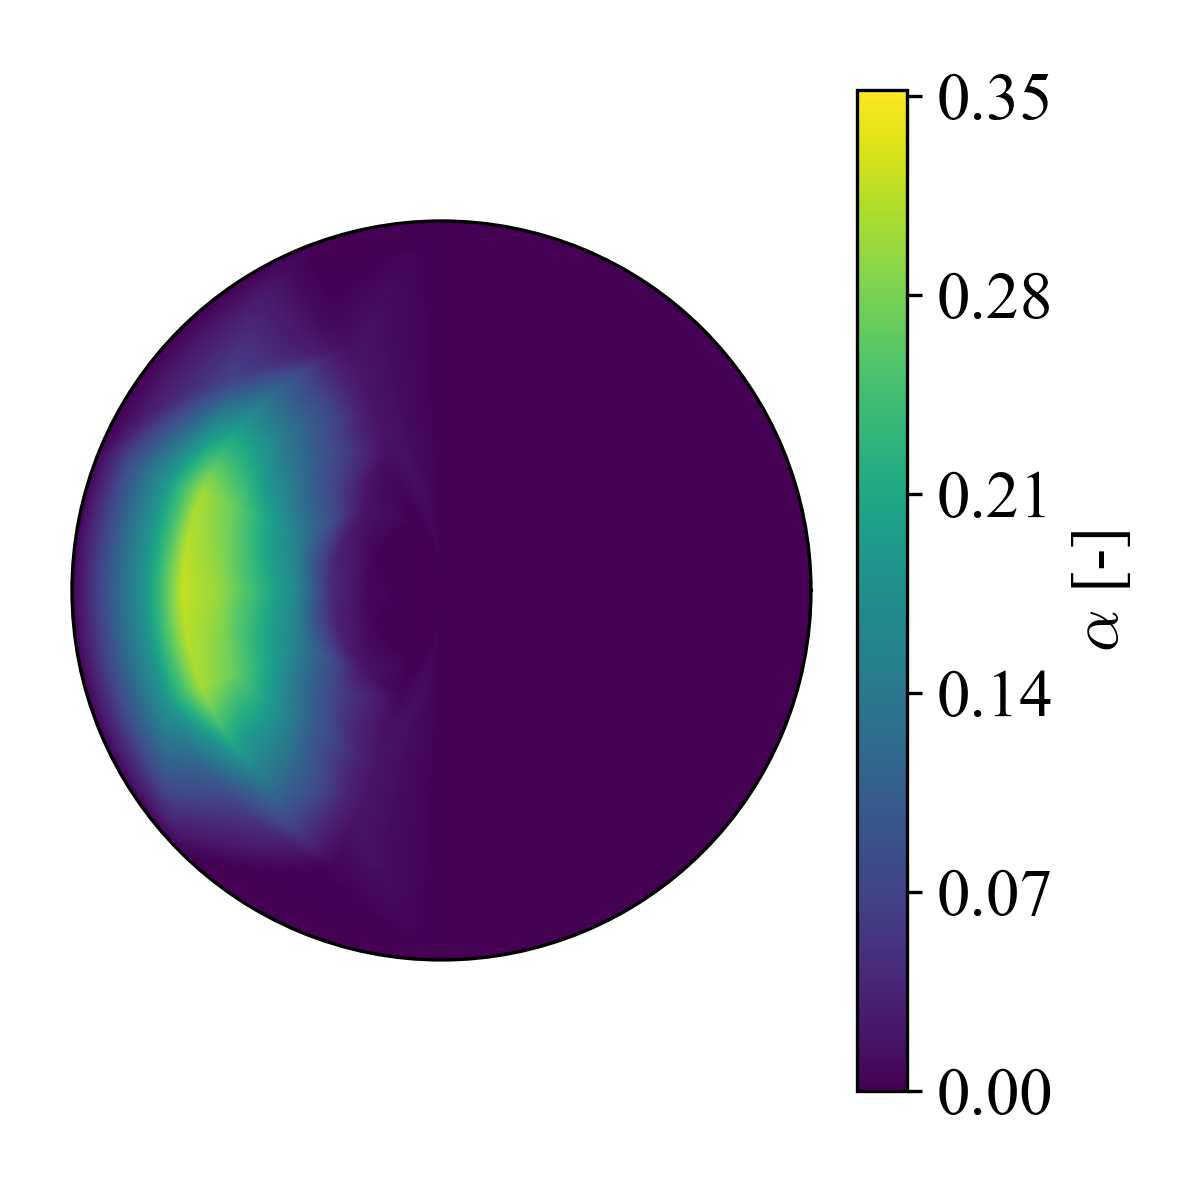

jf: 4.0 jg: 0.300774421644339 Port: P6
-90
alpha1:  0.08565966666666663
alpha2:  2.5888888888888863e-05
ai1:  272.91527777777776
ai2:  0.014188888888888872
alpha*vg1:  0.24187777777777775
alpha*vg2:  3.6666666666666625e-05
<<Dsm1>> 1.8674755729259198
alpha_variance:  3.460588754883798


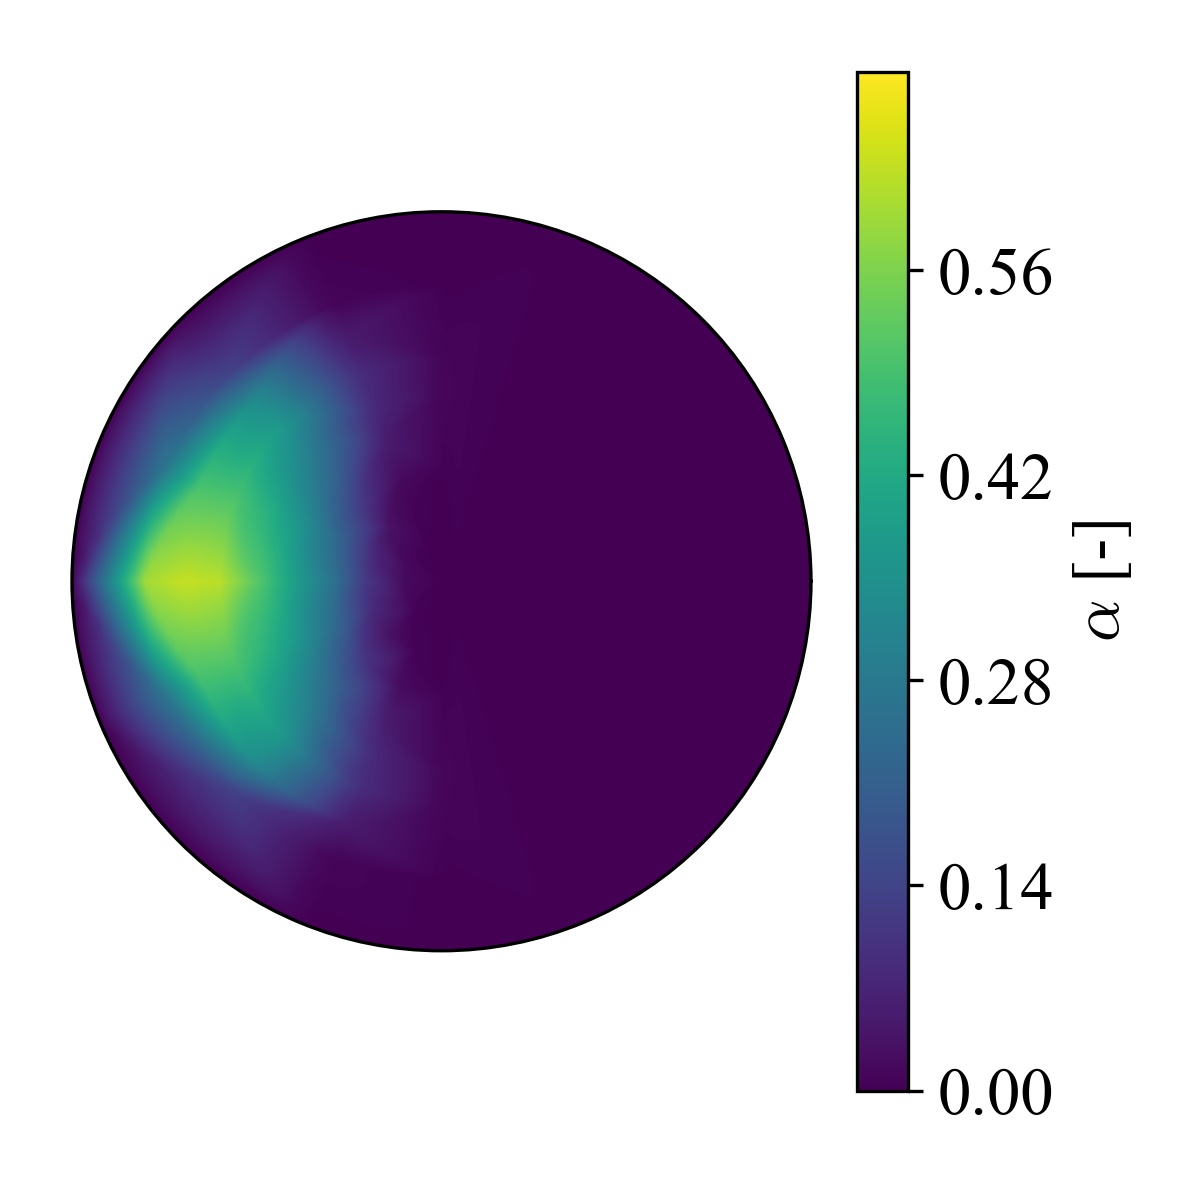

jf: 4.0 jg: 0.4041865838504172 Port: P6
-90
alpha1:  0.13069111111111106
alpha2:  0.002632555555555554
ai1:  323.4397111111111
ai2:  1.7316666666666654
alpha*vg1:  0.39546444444444445
alpha*vg2:  0.005255555555555552
<<Dsm1>> 2.5613403053549635
alpha_variance:  2.8529082642303947


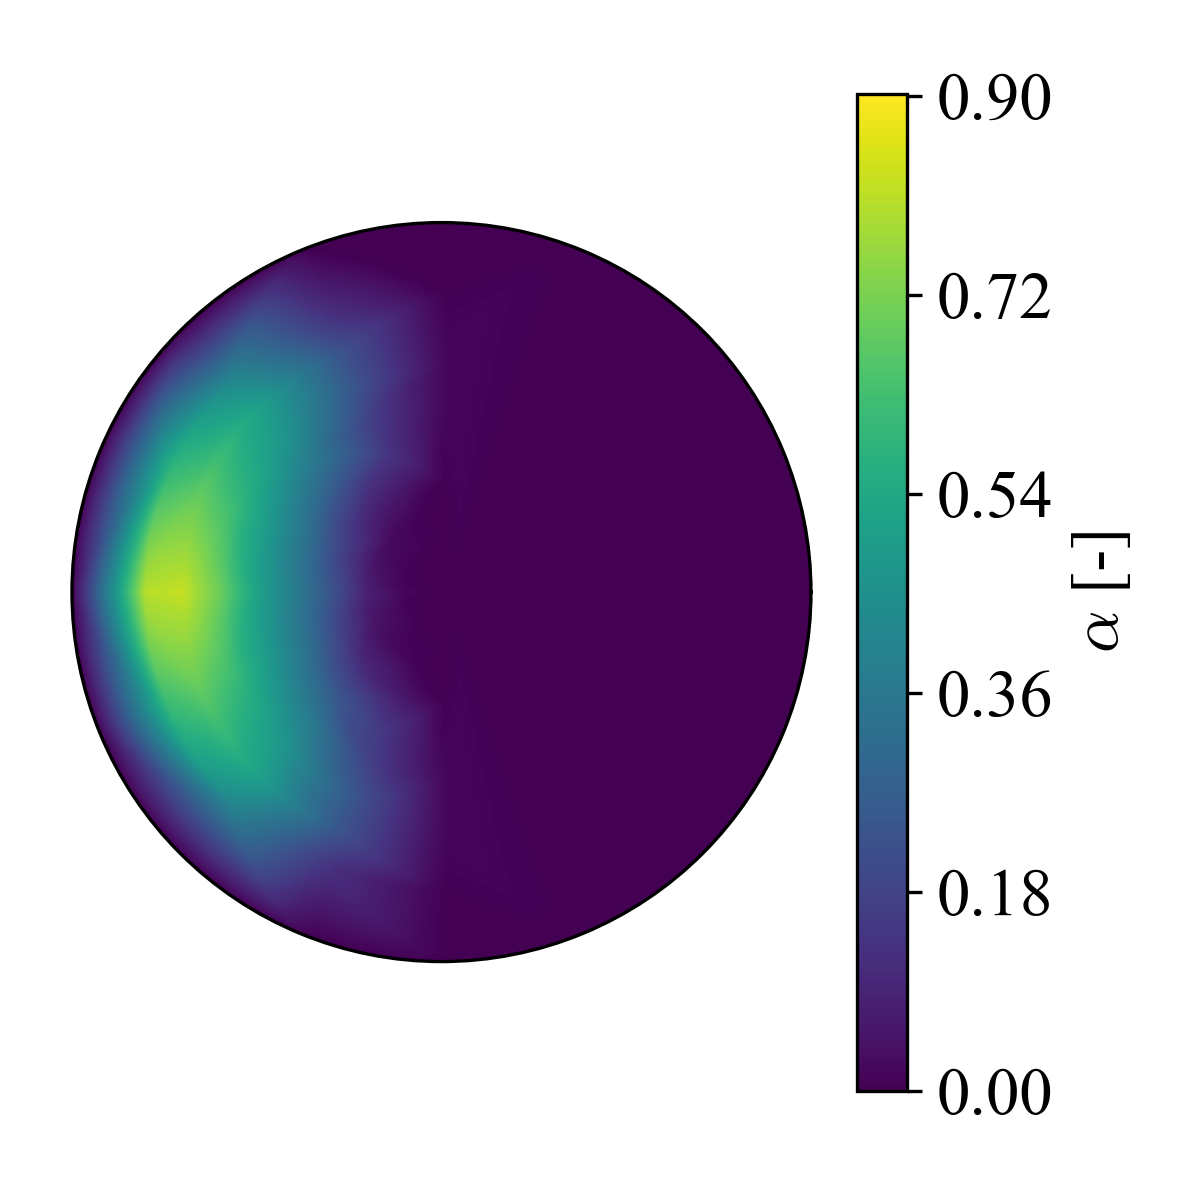

In [3]:
for cond in database:
    if 'P6' in cond.port:
        cond:Condition
        cond.mirror(method='sym90')  #P4-P10
        # cond.mirror(method='avg_axisym') #P1-P3

       # cond.pretty_print()
        jf = cond.jf
        jg = cond.jgloc
        Port = cond.port
        print('jf:', jf, 'jg:', jg, 'Port:', Port)
        print(cond.theta)

        print('alpha1: ', cond.area_avg('alpha_G1'))
        print('alpha2: ', cond.area_avg('alpha_G2'))
        # print('alpha: ', cond.area_avg('alpha'))
        #print('alpha*vg1: ', cond.area_avg('alpha_ug1'))
        print('ai1: ', cond.area_avg('ai_G1'))
        print('ai2: ', cond.area_avg('ai_G2'))
        
        print('alpha*vg1: ', cond.area_avg('alpha_ug1'))
        print('alpha*vg2: ', cond.area_avg('alpha_ug2'))
    #     print('<<vg>>: ', cond.void_area_avg('ug1'))
    #     #print('alpha*vg: ', cond.area_avg('alpha_ug1')+cond.area_avg('alpha_ug2'))
        print('<<Dsm1>>', cond.void_area_avg('Dsm1'))
    #    # print('<<Lcl1>>', cond.void_area_avg('Lcl1'))
        #print('<Lcl1>', cond.area_avg('Lcl1'))
        
        
        print('alpha_variance: ', cond.calc_sigma_alpha())
        # print('alpha1_variance: ', cond.calc_sigma_alpha1())
        #print('alpha_skewness: ', cond.calc_mu3_alpha())

        # plotDict = {'cmap': plt.cm.get_cmap('viridis'), 'edgecolor': 'None', 'linewidth': 0, 'color': 'k', 'antialiased': False}
        # cond.plot_surface( 'alpha', save_dir='ubend_surface', roll_angle=0, azim_angle=-130, elev_angle=30, 
        #                title=False, plot_surface_kwargs = plotDict, label_str=r'$\alpha$ [-]')
        
        # cond.plot_surface( 'ai', save_dir='ubend_surface', roll_angle=0, azim_angle=-130, elev_angle=30,
        #                   title=False, plot_surface_kwargs = plotDict,label_str=r'$a_{i}\ [1/m]$')
        # P3: roll_angle=0, azim_angle=-130, elev_angle=30
        # P4: roll_angle=-90, azim_angle=-100, elev_angle=30
        #P5-7: roll_angle=0, azim_angle=114, elev_angle=30
        # cond.plot_surface( 'ai', save_dir='ubend_surface', roll_angle=180, azim_angle=-170, elev_angle=60, 
        #                     title=False, zmax = False, plot_surface_kwargs = plotDict)

        # cond.plot_surface( 'ug1', save_dir='ubend_surface', roll_angle=180, azim_angle=-170, elev_angle=60, 
        #                     title=False, zmax = False, plot_surface_kwargs = plotDict)

        # cond.plot_surface( 'Dsm1', save_dir='ubend_surface', roll_angle=180, azim_angle=-170, elev_angle=60, 
        #                     title=False, zmax = False, plot_surface_kwargs = plotDict)
        #cond.plot_contour('alpha', ngridr = 100, colormap='jet', set_max=0.15, plot_title=False)  
        #cond.plot_contour('alpha', ngridr=200, ngridphi=100, colormap='viridis', rot_angle=-90, title=False, num_levels=100) set_max=0.25, num_levels=51
        cond.plot_contour('alpha', ngridr=200, ngridphi=100, colormap='viridis',rot_angle=180, title=False, num_levels=639, label_str=r'$\alpha$ [-]')
        # cond.plot_contour('ai', ngridr=200, ngridphi=100, colormap='viridis',rot_angle=180, title=False, num_levels=639, label_str=r'$a_{i}\ [1/m]$')
       # cond.plot_contour('alpha', ngridr=200, ngridphi=100, colormap='viridis',rot_angle=180, num_levels=200, set_max=0.19,title=False, label_str=r'$\alpha$ [-]')  
       # cond.plot_contour('ug1', ngridr=200, ngridphi=100, colormap='viridis',rot_angle=180, title=False, num_levels=200, label_str=r'$v_{g}\ [m/s]$')  
        # cond.plot_contour('ai', colormap='viridis', rot_angle=180, title = False,plot_measured_points=True,set_min=0, set_max=7, num_levels=141, label_str=r'$a_{i}\ [1/m]$')  
        # plot_measured_points=True

In [4]:
for cond in database:
    if cond.port in ['P1', 'P2', 'P3']:
       cond.mirror(method='avg_axisym')
    else:
        cond.mirror(method='sym90')
        
    #cond.calc_mu_eff()  
    #mu_m_avg = cond.void_area_avg('mu_m')
    cond.calc_COV_RC() 
    
    # Store COV_RC in a variable
    COV_RC = cond.COV_RC
    
    jf = cond.jf
    jg = cond.jgref
    Port = cond.port
    print('jf:', jf, 'jg:', jg, 'Port:', Port, 'COV_RC:', COV_RC)


jf: 0.7 jg: 0.334 Port: P1 COV_RC: 1.7234192005369693
jf: 0.7 jg: 0.334 Port: P10 COV_RC: 1.856843028521557
jf: 0.7 jg: 0.334 Port: P2 COV_RC: 1.4049509523885026
jf: 0.7 jg: 0.334 Port: P3 COV_RC: 1.9447189342995521
jf: 0.7 jg: 0.334 Port: P4 COV_RC: 2.183953181155246
jf: 0.7 jg: 0.334 Port: P5 COV_RC: 4.056682240371648
jf: 0.7 jg: 0.334 Port: P6 COV_RC: 0.45556187963472616
jf: 0.7 jg: 0.334 Port: P7 COV_RC: 17.330009955651345
jf: 0.7 jg: 0.334 Port: P8 COV_RC: 2.909432104625967
jf: 0.7 jg: 0.334 Port: P9 COV_RC: 1.8857835667407146
jf: 2.0 jg: 0.1 Port: P1 COV_RC: 2.272833241795704
jf: 2.0 jg: 0.1 Port: P10 COV_RC: 5.297396721831864
jf: 2.0 jg: 0.1 Port: P2 COV_RC: 2.0615640744597097
jf: 2.0 jg: 0.1 Port: P3 COV_RC: 1.7555054299359876
jf: 2.0 jg: 0.1 Port: P4 COV_RC: 6.599885931748448
jf: 2.0 jg: 0.1 Port: P5 COV_RC: 13.186185482787502
jf: 2.0 jg: 0.1 Port: P6 COV_RC: 4.131537794319024
jf: 2.0 jg: 0.1 Port: P7 COV_RC: 2.891715295284282
jf: 2.0 jg: 0.1 Port: P8 COV_RC: 2.373385861851214

In [5]:
for cond in database:
    if cond.port in ['P1', 'P2', 'P3']:
       cond.mirror(method='avg_axisym')
    else:
        cond.mirror(method='sym90')
        
    cond.calc_COV_TI() 
    
    # Store COV_RC in a variable
    COV_TI = cond.COV_TI
    
    jf = cond.jf
    jg = cond.jgref
    Port = cond.port
    print('jf:', jf, 'jg:', jg, 'Port:', Port, 'COV_TI:', COV_TI)


jf: 0.7 jg: 0.334 Port: P1 COV_TI: 0
jf: 0.7 jg: 0.334 Port: P10 COV_TI: 1.0121151961029375
jf: 0.7 jg: 0.334 Port: P2 COV_TI: 0
jf: 0.7 jg: 0.334 Port: P3 COV_TI: 0
jf: 0.7 jg: 0.334 Port: P4 COV_TI: 0.8917441307432719
jf: 0.7 jg: 0.334 Port: P5 COV_TI: 0.9651594921365875
jf: 0.7 jg: 0.334 Port: P6 COV_TI: 0.9107027344169822
jf: 0.7 jg: 0.334 Port: P7 COV_TI: 1.0090302479418425
jf: 0.7 jg: 0.334 Port: P8 COV_TI: 1.011737095908369
jf: 0.7 jg: 0.334 Port: P9 COV_TI: 1.0055499862268886
jf: 2.0 jg: 0.1 Port: P1 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P10 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P2 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P3 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P4 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P5 COV_TI: 0.8170621811414924
jf: 2.0 jg: 0.1 Port: P6 COV_TI: 0.9804609016896813
jf: 2.0 jg: 0.1 Port: P7 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P8 COV_TI: 0
jf: 2.0 jg: 0.1 Port: P9 COV_TI: 0
jf: 2.0 jg: 0.334 Port: P1 COV_TI: 0
jf: 2.0 jg: 0.334 Port: P10 COV_TI: 0.9767997843943622
jf: 2.0 jg: 0.334 Port: P2 COV_TI: